In [63]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [54]:
file_path = 'chatbots_impact_on_learning.csv'

# Carregando o dataset
data_chatbot = pd.read_csv(file_path, delimiter=";")

# Exibindo as primeiras linhas do dataset
display(data_chatbot.head())

# Visualizando informações gerais sobre os dados
display(data_chatbot.info())

,Timestamp,Q1,Q2,Q3,Q4,Q5.1,Q5.2,Q5.3,Q5.4,Q5.5,...,Q8.2,Q8.3,Q8.4,Q8.5,Q9.1,Q9.2,Q9.3,Q9.4,Q9.5,Q10
0,5.14.2023 21:22:19,2,International Economic Relations,1,4,4,4,5,5,4,...,5,5,4,5,4,5,5,4,4,NaN
1,5.15.2023 8:45:52,1,International Economic Relations,1,3,2,4,2,1,3,...,4,4,2,3,3,4,3,2,2,NaN
2,5.15.2023 9:54:15,1,International Economic Relations,1,2,3,3,3,2,3,...,4,4,3,3,3,3,2,2,3,NaN
3,5.15.2023 15:17:41,1,International Economic Relations,1,2,4,4,4,2,4,...,4,4,4,4,4,4,3,4,4,NaN
4,5.15.2023 15:19:02,1,International Economic Relations,1,3,4,4,3,2,4,...,4,4,3,3,3,3,3,3,3,NaN


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 131 entries, 0 to 130
Data columns (total 34 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Timestamp  131 non-null    object
 1   Q1         131 non-null    int64 
 2   Q2         131 non-null    object
 3   Q3         131 non-null    int64 
 4   Q4         131 non-null    int64 
 5   Q5.1       131 non-null    int64 
 6   Q5.2       131 non-null    int64 
 7   Q5.3       131 non-null    int64 
 8   Q5.4       131 non-null    int64 
 9   Q5.5       131 non-null    int64 
 10  Q5.6       131 non-null    int64 
 11  Q6.1       131 non-null    int64 
 12  Q6.2       131 non-null    int64 
 13  Q6.3       131 non-null    int64 
 14  Q6.4       131 non-null    int64 
 15  Q6.5       131 non-null    int64 
 16  Q6.6       131 non-null    int64 
 17  Q6.7       131 non-null    int64 
 18  Q6.8       131 non-null    int64 
 19  Q7.1       131 non-null    int64 
 20  Q7.2       131 non-null    int64

None

In [56]:
data_chatbot = data_chatbot.rename(columns={'Timestamp':'Data/Hora',
                        'Q1':'Nível Acadêmico',
                        'Q2':'Curso',
                        'Q3':'Sexo',
                        'Q4':'Já usou tecnologias de IA generativa como o ChatGPT?',
                        'Q5.1':'Entendo que tecnologias de IA generativa como o ChatGPT têm limitações na capacidade de lidar com tarefas complexas',
                        'Q5.2':'Entendo que tecnologias de IA generativa como o ChatGPT podem gerar saídas que são factualmente imprecisas',
                        'Q5.3':'Entendo que tecnologias de IA generativa como o ChatGPT podem gerar saídas que estão fora de contexto ou inadequadas',
                        'Q5.4':'Entendo que tecnologias de IA generativa como o ChatGPT podem exibir preconceitos e injustiças em suas saídas',
                        'Q5.5':'Entendo que tecnologias de IA generativa como o ChatGPT podem depender excessivamente de estatísticas, o que pode limitar sua utilidade em certos contextos',
                        'Q5.6':'Entendo que tecnologias de IA generativa como o ChatGPT têm inteligência emocional e empatia limitadas, o que pode levar a saídas que são insensíveis ou inadequadas',
                        'Q6.1': 'Eu imagino integrar tecnologias de IA generativa como o ChatGPT nas minhas práticas de ensino e aprendizagem no futuro.',
                        'Q6.2': 'Os alunos devem aprender a usar bem as tecnologias de IA generativa para suas carreiras',
                        'Q6.3': 'Acredito que tecnologias de IA generativa, como o ChatGPT, podem melhorar minha competência digital',
                        'Q6.4': 'Acredito que tecnologias de IA generativa, como o ChatGPT, podem me ajudar a economizar tempo',
                        'Q6.5': 'Acredito que tecnologias de IA, como o ChatGPT, podem me fornecer insights e perspectivas únicas que eu talvez não tenha pensado por mim mesmo',
                        'Q6.6': 'Acho que tecnologias de IA, como o ChatGPT, podem me fornecer feedback e sugestões personalizadas e imediatas para minhas tarefas',
                        'Q6.7': 'Acho que tecnologias de IA, como o ChatGPT, são uma ótima ferramenta, pois está disponível 24/7',
                        'Q6.8': 'Acho que tecnologias de IA, como o ChatGPT, são uma ótima ferramenta para serviços de apoio aos estudantes devido ao anonimato',
                        'Q7.1': 'Usar tecnologias de IA generativa, como o ChatGPT, para completar tarefas mina o valor da educação universitária',
                        'Q7.2': 'Tecnologias de IA generativa, como o ChatGPT, limitarão minhas oportunidades de interagir com outras pessoas e socializar enquanto faço o trabalho',
                        'Q7.3': 'Tecnologias de IA generativa, como o ChatGPT, prejudicarão meu desenvolvimento de habilidades genéricas ou transferíveis, como trabalho em equipe, resolução de problemas e habilidades de liderança',
                        'Q7.4': 'Posso me tornar excessivamente dependente de tecnologias de IA generativa',
                        'Q8.1': 'Apoio personalizado e imediato ao aprendizado',
                        'Q8.2': 'Apoio na escrita e brainstorming',
                        'Q8.3': 'Apoio em pesquisa e análise',
                        'Q8.4': 'Apoio multimídia visual e áudio',
                        'Q8.5': 'Apoio administrativo',
                        'Q9.1': 'Precisão e transparência',
                        'Q9.2': 'Questões de privacidade e éticas',
                        'Q9.3': 'Competências holísticas',
                        'Q9.4': 'Perspectivas de carreira',
                        'Q9.5': 'Valores humanos',
                        'Q10': 'O ChatGPT transformou sua percepção sobre inteligência artificial e chatbots inteligentes? Quais vantagens ele oferece para você como estudante? Existem desvantagens ou limitações que você experienciou?'
                        })

display(data_chatbot.head())

,Data/Hora,Nível Acadêmico,Curso,Sexo,Já usou tecnologias de IA generativa como o ChatGPT?,Entendo que tecnologias de IA generativa como o ChatGPT têm limitações na capacidade de lidar com tarefas complexas,Entendo que tecnologias de IA generativa como o ChatGPT podem gerar saídas que são factualmente imprecisas,Entendo que tecnologias de IA generativa como o ChatGPT podem gerar saídas que estão fora de contexto ou inadequadas,Entendo que tecnologias de IA generativa como o ChatGPT podem exibir preconceitos e injustiças em suas saídas,"Entendo que tecnologias de IA generativa como o ChatGPT podem depender excessivamente de estatísticas, o que pode limitar sua utilidade em certos contextos",...,Apoio na escrita e brainstorming,Apoio em pesquisa e análise,Apoio multimídia visual e áudio,Apoio administrativo,Precisão e transparência,Questões de privacidade e éticas,Competências holísticas,Perspectivas de carreira,Valores humanos,O ChatGPT transformou sua percepção sobre inteligência artificial e chatbots inteligentes? Quais vantagens ele oferece para você como estudante? Existem desvantagens ou limitações que você experienciou?
0,5.14.2023 21:22:19,2,International Economic Relations,1,4,4,4,5,5,4,...,5,5,4,5,4,5,5,4,4,NaN
1,5.15.2023 8:45:52,1,International Economic Relations,1,3,2,4,2,1,3,...,4,4,2,3,3,4,3,2,2,NaN
2,5.15.2023 9:54:15,1,International Economic Relations,1,2,3,3,3,2,3,...,4,4,3,3,3,3,2,2,3,NaN
3,5.15.2023 15:17:41,1,International Economic Relations,1,2,4,4,4,2,4,...,4,4,4,4,4,4,3,4,4,NaN
4,5.15.2023 15:19:02,1,International Economic Relations,1,3,4,4,3,2,4,...,4,4,3,3,3,3,3,3,3,NaN


In [59]:
# Aplicar o método factorize para transformar strings da coluna 'Curso' em números únicos
data_chatbot['Curso'], _ = pd.factorize(data_chatbot['Curso'])

# Exibir as primeiras 10 linhas do dataset após a transformação
data_chatbot.head(10)

,Data/Hora,Nível Acadêmico,Curso,Sexo,Já usou tecnologias de IA generativa como o ChatGPT?,Entendo que tecnologias de IA generativa como o ChatGPT têm limitações na capacidade de lidar com tarefas complexas,Entendo que tecnologias de IA generativa como o ChatGPT podem gerar saídas que são factualmente imprecisas,Entendo que tecnologias de IA generativa como o ChatGPT podem gerar saídas que estão fora de contexto ou inadequadas,Entendo que tecnologias de IA generativa como o ChatGPT podem exibir preconceitos e injustiças em suas saídas,"Entendo que tecnologias de IA generativa como o ChatGPT podem depender excessivamente de estatísticas, o que pode limitar sua utilidade em certos contextos",...,Apoio na escrita e brainstorming,Apoio em pesquisa e análise,Apoio multimídia visual e áudio,Apoio administrativo,Precisão e transparência,Questões de privacidade e éticas,Competências holísticas,Perspectivas de carreira,Valores humanos,O ChatGPT transformou sua percepção sobre inteligência artificial e chatbots inteligentes? Quais vantagens ele oferece para você como estudante? Existem desvantagens ou limitações que você experienciou?
0,5.14.2023 21:22:19,2,0,1,4,4,4,5,5,4,...,5,5,4,5,4,5,5,4,4,NaN
1,5.15.2023 8:45:52,1,1,1,3,2,4,2,1,3,...,4,4,2,3,3,4,3,2,2,NaN
2,5.15.2023 9:54:15,1,0,1,2,3,3,3,2,3,...,4,4,3,3,3,3,2,2,3,NaN
3,5.15.2023 15:17:41,1,0,1,2,4,4,4,2,4,...,4,4,4,4,4,4,3,4,4,NaN
4,5.15.2023 15:19:02,1,0,1,3,4,4,3,2,4,...,4,4,3,3,3,3,3,3,3,NaN
5,5.15.2023 15:23:54,1,0,2,2,5,4,4,2,4,...,4,3,2,1,3,4,3,1,2,AI should not be overused by either students o...
6,5.15.2023 15:24:12,1,0,2,3,3,4,4,3,3,...,4,4,3,3,4,3,3,4,3,I like them.
7,5.15.2023 19:17:51,2,2,2,2,2,4,4,3,2,...,4,4,4,3,4,3,3,4,3,A specialized course could be created to prepa...
8,5.15.2023 19:26:12,1,2,2,3,3,4,4,3,3,...,4,4,3,3,4,3,3,3,2,Educators should familiarize more students wit...
9,5.16.2023 9:04:40,1,3,1,4,4,2,3,1,3,...,4,4,2,3,3,4,3,3,3,NaN


In [61]:
# Exibe a quantidade de valores ausentes (NaN) em cada coluna do DataFrame
print(data_chatbot.isna().sum())

Data/Hora                                                                                                                                                                                                      0
Nível Acadêmico                                                                                                                                                                                                0
Curso                                                                                                                                                                                                          0
Sexo                                                                                                                                                                                                           0
Já usou tecnologias de IA generativa como o ChatGPT?                                                                                                                

In [62]:
# Remover a coluna 'Q10'
data_chatbot = data_chatbot.drop(columns=['O ChatGPT transformou sua percepção sobre inteligência artificial e chatbots inteligentes? Quais vantagens ele oferece para você como estudante? Existem desvantagens ou limitações que você experienciou?'])
data_chatbot.head(10)


,Data/Hora,Nível Acadêmico,Curso,Sexo,Já usou tecnologias de IA generativa como o ChatGPT?,Entendo que tecnologias de IA generativa como o ChatGPT têm limitações na capacidade de lidar com tarefas complexas,Entendo que tecnologias de IA generativa como o ChatGPT podem gerar saídas que são factualmente imprecisas,Entendo que tecnologias de IA generativa como o ChatGPT podem gerar saídas que estão fora de contexto ou inadequadas,Entendo que tecnologias de IA generativa como o ChatGPT podem exibir preconceitos e injustiças em suas saídas,"Entendo que tecnologias de IA generativa como o ChatGPT podem depender excessivamente de estatísticas, o que pode limitar sua utilidade em certos contextos",...,Apoio personalizado e imediato ao aprendizado,Apoio na escrita e brainstorming,Apoio em pesquisa e análise,Apoio multimídia visual e áudio,Apoio administrativo,Precisão e transparência,Questões de privacidade e éticas,Competências holísticas,Perspectivas de carreira,Valores humanos
0,5.14.2023 21:22:19,2,0,1,4,4,4,5,5,4,...,4,5,5,4,5,4,5,5,4,4
1,5.15.2023 8:45:52,1,1,1,3,2,4,2,1,3,...,4,4,4,2,3,3,4,3,2,2
2,5.15.2023 9:54:15,1,0,1,2,3,3,3,2,3,...,4,4,4,3,3,3,3,2,2,3
3,5.15.2023 15:17:41,1,0,1,2,4,4,4,2,4,...,4,4,4,4,4,4,4,3,4,4
4,5.15.2023 15:19:02,1,0,1,3,4,4,3,2,4,...,3,4,4,3,3,3,3,3,3,3
5,5.15.2023 15:23:54,1,0,2,2,5,4,4,2,4,...,5,4,3,2,1,3,4,3,1,2
6,5.15.2023 15:24:12,1,0,2,3,3,4,4,3,3,...,4,4,4,3,3,4,3,3,4,3
7,5.15.2023 19:17:51,2,2,2,2,2,4,4,3,2,...,3,4,4,4,3,4,3,3,4,3
8,5.15.2023 19:26:12,1,2,2,3,3,4,4,3,3,...,3,4,4,3,3,4,3,3,3,2
9,5.16.2023 9:04:40,1,3,1,4,4,2,3,1,3,...,4,4,4,2,3,3,4,3,3,3


C:\Users\enzok\AppData\Local\Temp\ipykernel_20860\3810042656.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=sexo_counts.index, y=sexo_counts.values, palette=colors)


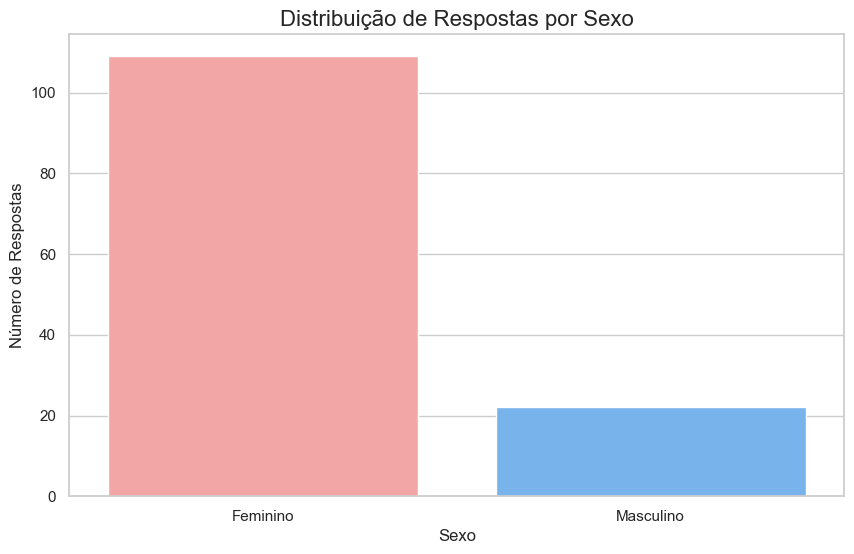

In [81]:
# Ajustar o estilo do gráfico
sns.set_theme(style="whitegrid")

# Contar a quantidade de homens e mulheres que responderam
sexo_counts = data_chatbot['Sexo'].value_counts()

# Criar um dicionário para mapear os números para os sexos corretos
sexo_map = {1: 'Feminino', 2: 'Masculino'}

# Renomear os índices com base no mapeamento
sexo_counts.index = sexo_counts.index.map(sexo_map)

# Definir as cores para as barras
colors = ['#FF9999' if sex == 'Feminino' else '#66B3FF' for sex in sexo_counts.index]

# Plotar um gráfico de barras
plt.figure(figsize=(10, 6))
sns.barplot(x=sexo_counts.index, y=sexo_counts.values, palette=colors)

# Adicionar título e rótulos aos eixos
plt.title('Distribuição de Respostas por Sexo', fontsize=16)
plt.xlabel('Sexo', fontsize=12)
plt.ylabel('Número de Respostas', fontsize=12)

# Exibir o gráfico
plt.show()

A significativa discrepância no número de respostas entre mulheres (mais de 100) e homens (pouco mais de 20) no questionário sobre o impacto dos chatbots na aprendizagem apresenta várias implicações para a análise dos dados.

- Representatividade da Amostra: A amostra desbalanceada pode comprometer a representatividade dos resultados. As percepções e experiências das mulheres podem ser predominantemente capturadas, enquanto as opiniões dos homens podem estar sub-representadas.

- Generalização dos Resultados: Conclusões tiradas do estudo podem não ser generalizáveis para toda a população estudantil. Diferenças de gênero nas experiências e opiniões em relação ao uso de chatbots podem não ser adequadamente refletidas, limitando a validade das conclusões.

- Análise de Subgrupos: A baixa amostra masculina dificulta comparações significativas entre os gêneros, tornando os resultados menos confiáveis. A identificação de diferenças nas percepções de uso entre homens e mulheres pode ser limitada.

- Efeito de Gênero: Diferenças nas tendências de uso e percepção de tecnologias de IA generativa entre os gêneros podem estar presentes, mas não identificadas devido ao viés na amostra.

- Validade Externa: A capacidade de generalizar os resultados para outras populações pode ser comprometida, sugerindo que estudos futuros busquem amostras mais equilibradas.

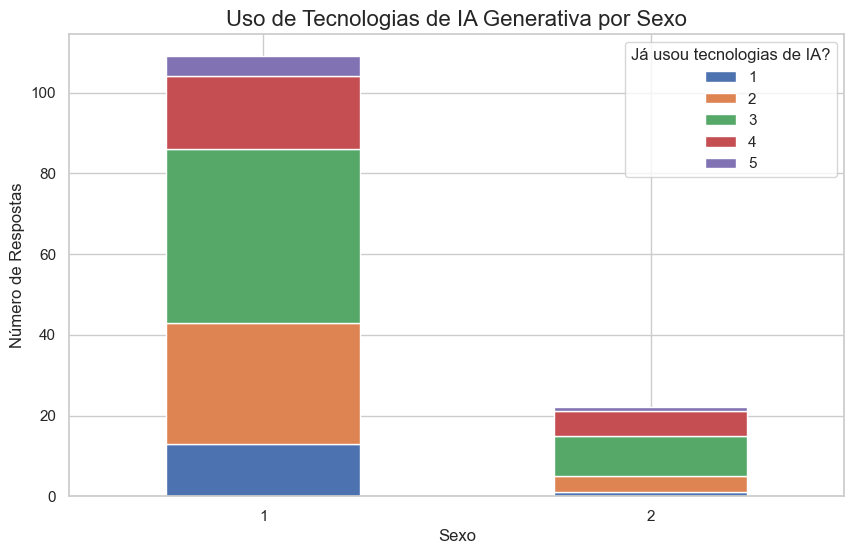

In [83]:
# Ajustar o estilo do gráfico
sns.set(style="whitegrid")

# Criar uma tabela de contingência para contar o uso de IA por sexo
contingency_table = pd.crosstab(data_chatbot['Sexo'], data_chatbot['Já usou tecnologias de IA generativa como o ChatGPT?'])

# Plotar um gráfico de barras
contingency_table.plot(kind='bar', stacked=True, figsize=(10, 6))

# Adicionar título e rótulos aos eixos
plt.title('Uso de Tecnologias de IA Generativa por Sexo', fontsize=16)
plt.xlabel('Sexo', fontsize=12)
plt.ylabel('Número de Respostas', fontsize=12)

# Exibir o gráfico
plt.xticks(rotation=0)
plt.legend(title='Já usou tecnologias de IA?')
plt.show()

In [82]:
# Calcular a média para cada categoria de 'Sexo'
media_por_sexo = data_chatbot.groupby('Sexo')["Já usou tecnologias de IA generativa como o ChatGPT?"].mean().reset_index()

# Renomear as colunas para tornar mais claro
media_por_sexo.columns = ['Sexo', 'Média - Já usou tecnologias de IA generativa como o ChatGPT?']

# Exibir o DataFrame sem os índices numéricos
print(media_por_sexo.to_string(index=False))


 Sexo  Média - Já usou tecnologias de IA generativa como o ChatGPT?
    1                                                      2.743119
    2                                                      3.090909


C:\Users\enzok\AppData\Local\Temp\ipykernel_20860\4147972070.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Sexo', y='Média - Já usou tecnologias de IA generativa como o ChatGPT?', data=media_por_sexo,palette=cores)


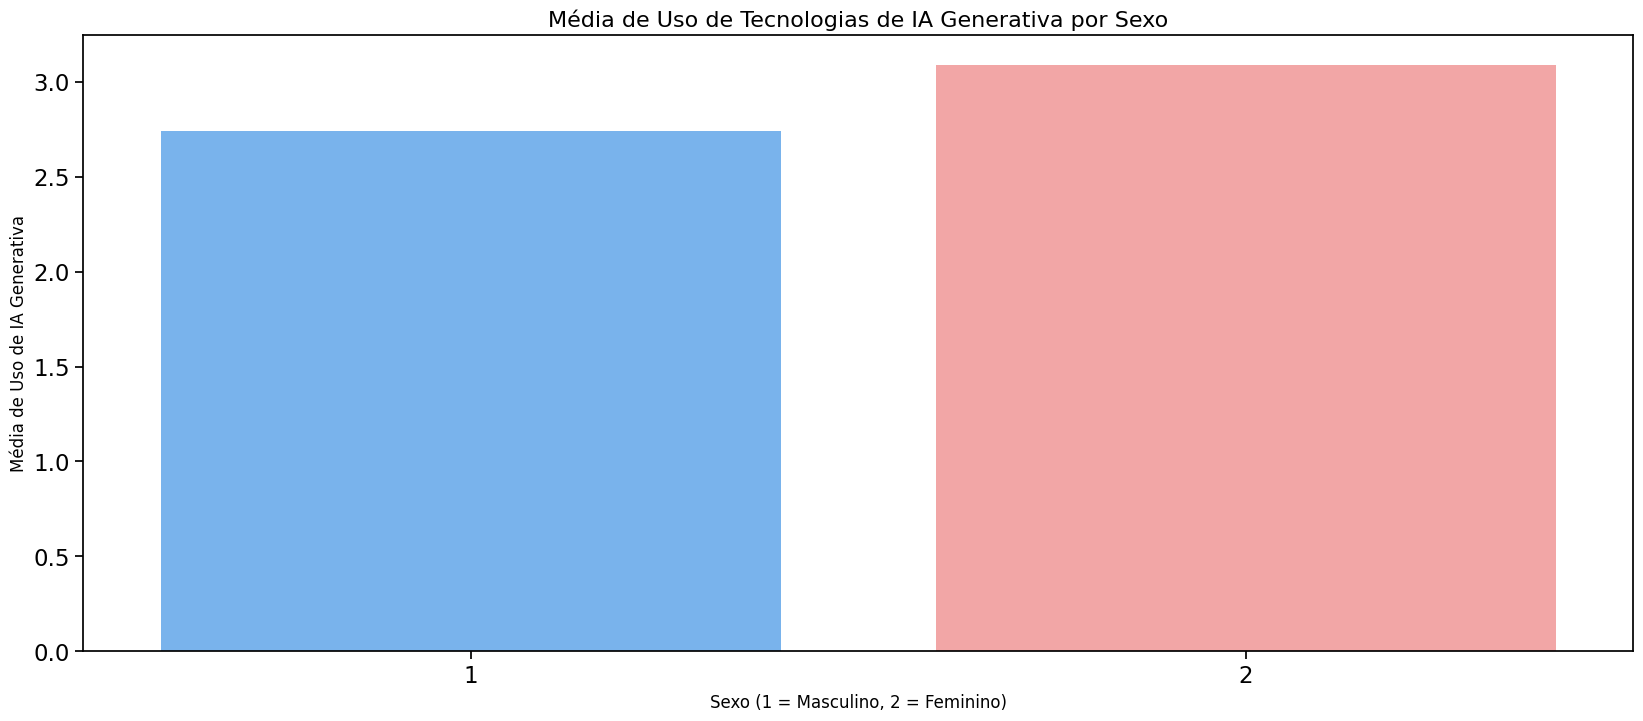

In [26]:
cores = ['#66B3FF','#FF9999']  # Vermelho e Azul
# Definindo o estilo do gráfico
plt.rcParams["figure.figsize"] = [20, 8]
sns.set_context("notebook", font_scale=1.5, rc={"font.size": 14, "axes.titlesize": 16, "axes.labelsize": 12})

# Supondo que media_por_sexo já foi calculado conforme anterior
# Exemplo de como o DataFrame 'media_por_sexo' poderia ser:
# media_por_sexo = pd.DataFrame({'Sexo': [1, 2], 'Média de Uso de IA Generativa como o ChatGPT': [2.743119, 3.090909]})

# Criar o gráfico de barras
sns.barplot(x='Sexo', y='Média - Já usou tecnologias de IA generativa como o ChatGPT?', data=media_por_sexo,palette=cores)

# Adicionando título e rótulos
plt.title("Média de Uso de Tecnologias de IA Generativa por Sexo")
plt.ylabel("Média de Uso de IA Generativa")
plt.xlabel("Sexo (1 = Masculino, 2 = Feminino)")

# Exibir o gráfico
plt.show()

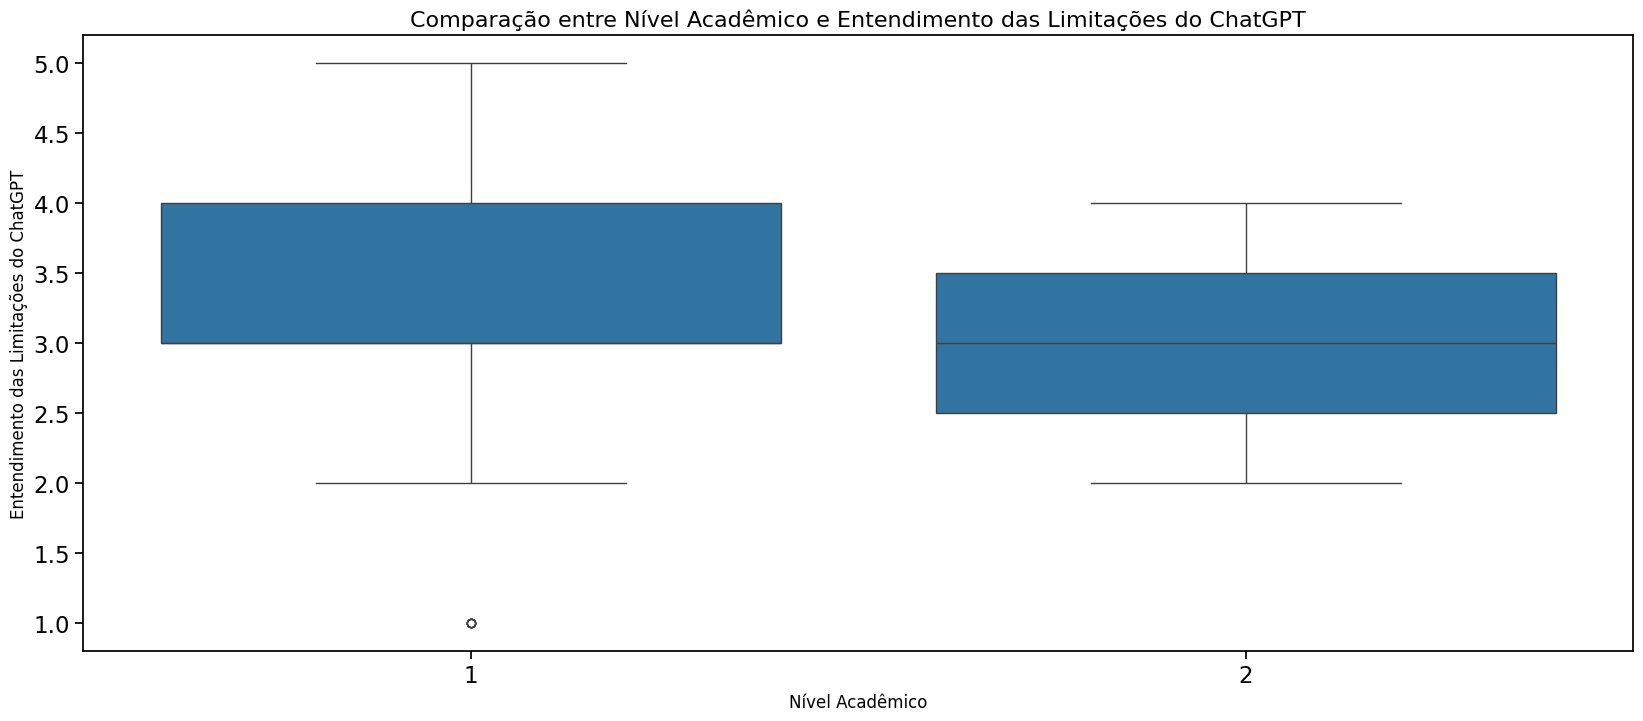

In [27]:
# Criando o box plot
plt.figure(figsize=(20, 8))
sns.boxplot(x='Nível Acadêmico', y='Entendo que tecnologias de IA generativa como o ChatGPT têm limitações na capacidade de lidar com tarefas complexas', data=df_chatbot)

# Adicionando título e rótulos
plt.title('Comparação entre Nível Acadêmico e Entendimento das Limitações do ChatGPT')
plt.xlabel('Nível Acadêmico')
plt.ylabel('Entendimento das Limitações do ChatGPT')

# Mostrando o gráfico
plt.show()

C:\Users\enzok\AppData\Local\Temp\ipykernel_20860\1217558147.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='Nível Acadêmico', y='Entendo que tecnologias de IA generativa como o ChatGPT têm limitações na capacidade de lidar com tarefas complexas', data=df_chatbot, ci=None)


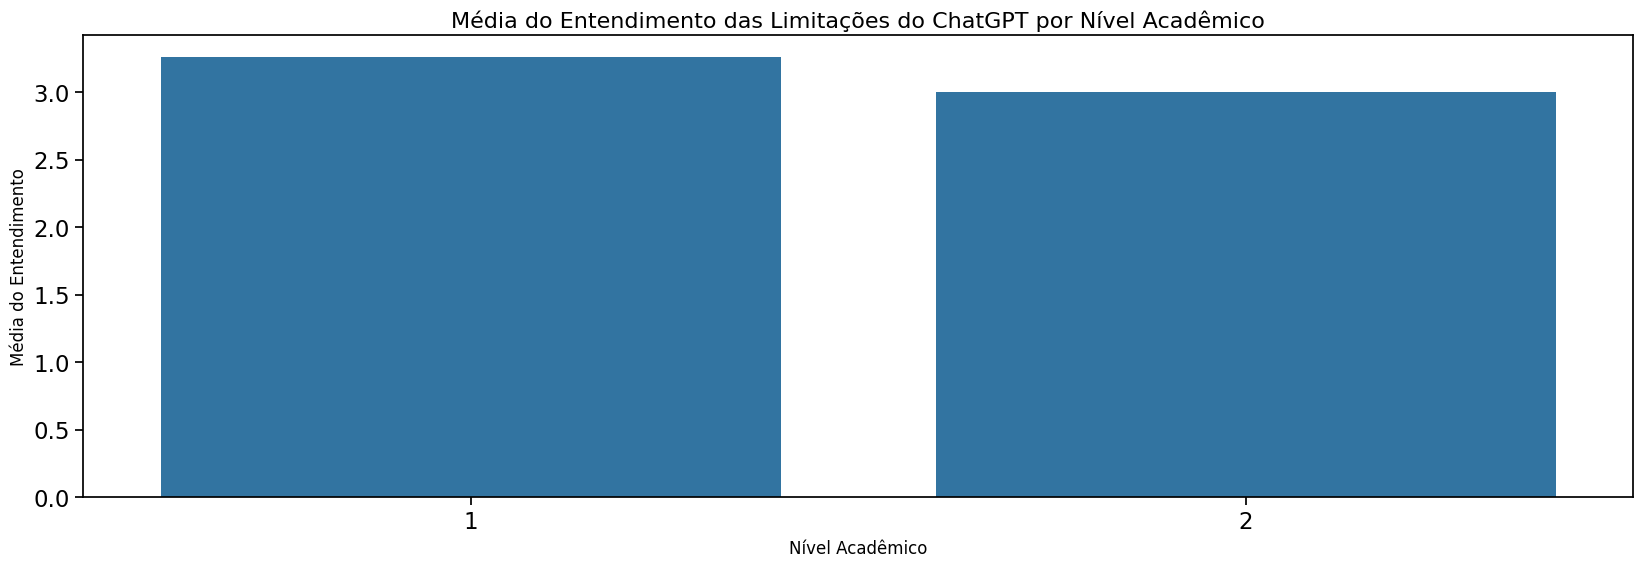

In [28]:
plt.figure(figsize=(20, 6))
sns.barplot(x='Nível Acadêmico', y='Entendo que tecnologias de IA generativa como o ChatGPT têm limitações na capacidade de lidar com tarefas complexas', data=df_chatbot, ci=None)

plt.title('Média do Entendimento das Limitações do ChatGPT por Nível Acadêmico')
plt.xlabel('Nível Acadêmico')
plt.ylabel('Média do Entendimento')
plt.show()


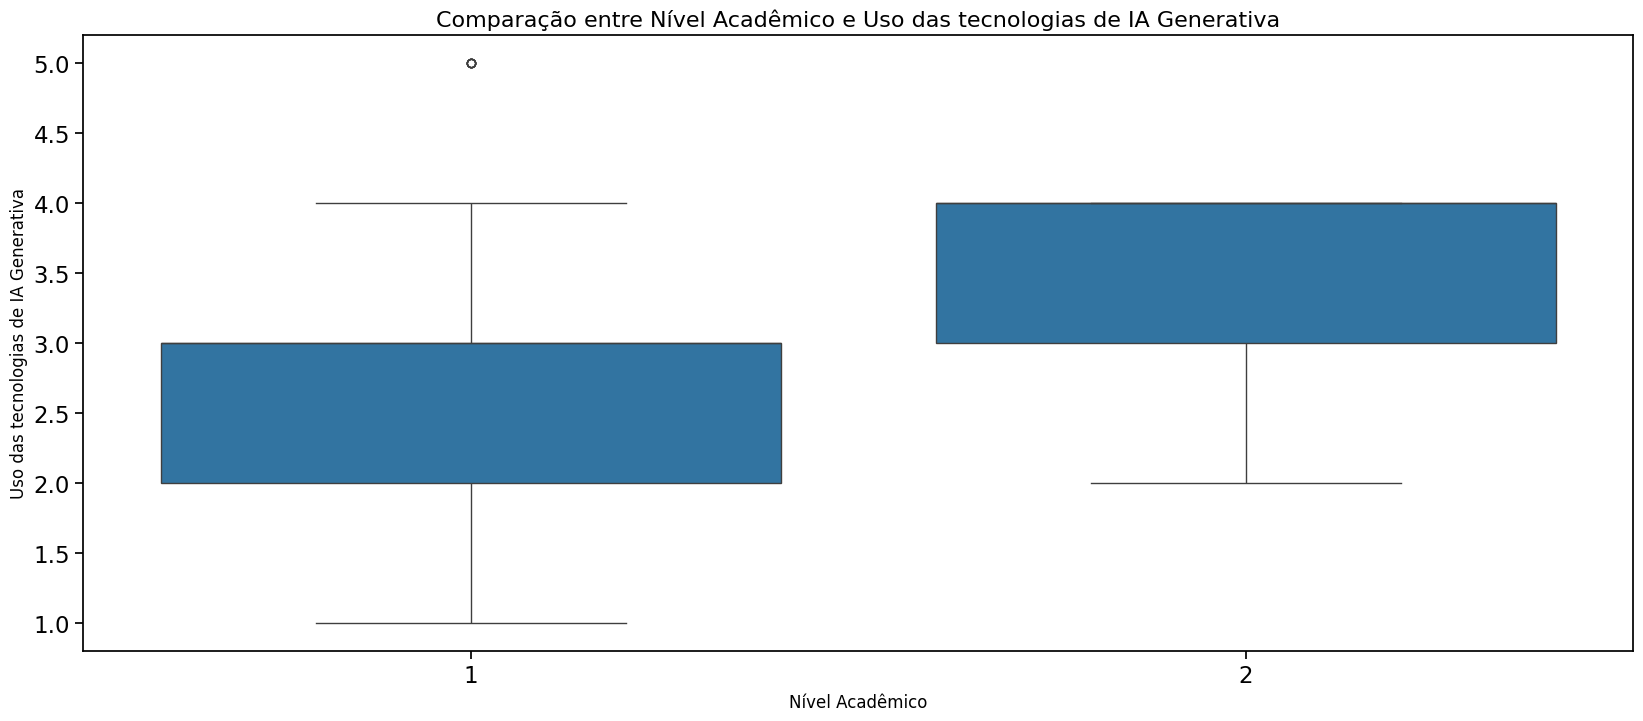

In [29]:
# Criando o box plot
plt.figure(figsize=(20, 8))
sns.boxplot(x='Nível Acadêmico', y='Já usou tecnologias de IA generativa como o ChatGPT?', data=df_chatbot)

# Adicionando título e rótulos
plt.title('Comparação entre Nível Acadêmico e Uso das tecnologias de IA Generativa')
plt.xlabel('Nível Acadêmico')
plt.ylabel('Uso das tecnologias de IA Generativa')

# Mostrando o gráfico
plt.show()


C:\Users\enzok\AppData\Local\Temp\ipykernel_20860\658220730.py:4: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='Já usou tecnologias de IA generativa como o ChatGPT?',
C:\Users\enzok\AppData\Local\Temp\ipykernel_20860\658220730.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Já usou tecnologias de IA generativa como o ChatGPT?',


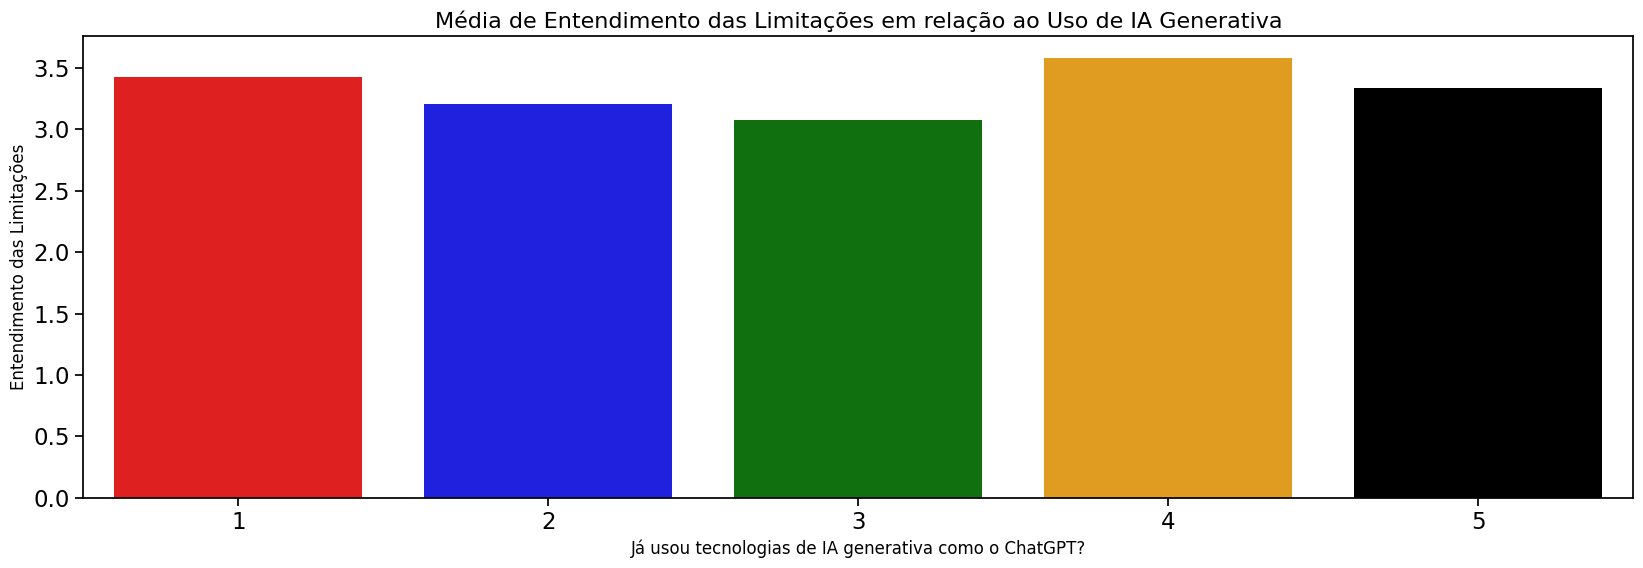

In [30]:
cores = ['red', 'blue', 'green', 'orange', 'black']

plt.figure(figsize=(20, 6))
sns.barplot(x='Já usou tecnologias de IA generativa como o ChatGPT?', 
            y='Entendo que tecnologias de IA generativa como o ChatGPT têm limitações na capacidade de lidar com tarefas complexas', 
            data=df_chatbot, ci=None, palette=cores)

plt.title('Média de Entendimento das Limitações em relação ao Uso de IA Generativa')
plt.xlabel('Já usou tecnologias de IA generativa como o ChatGPT?')
plt.ylabel('Entendimento das Limitações')
plt.show()


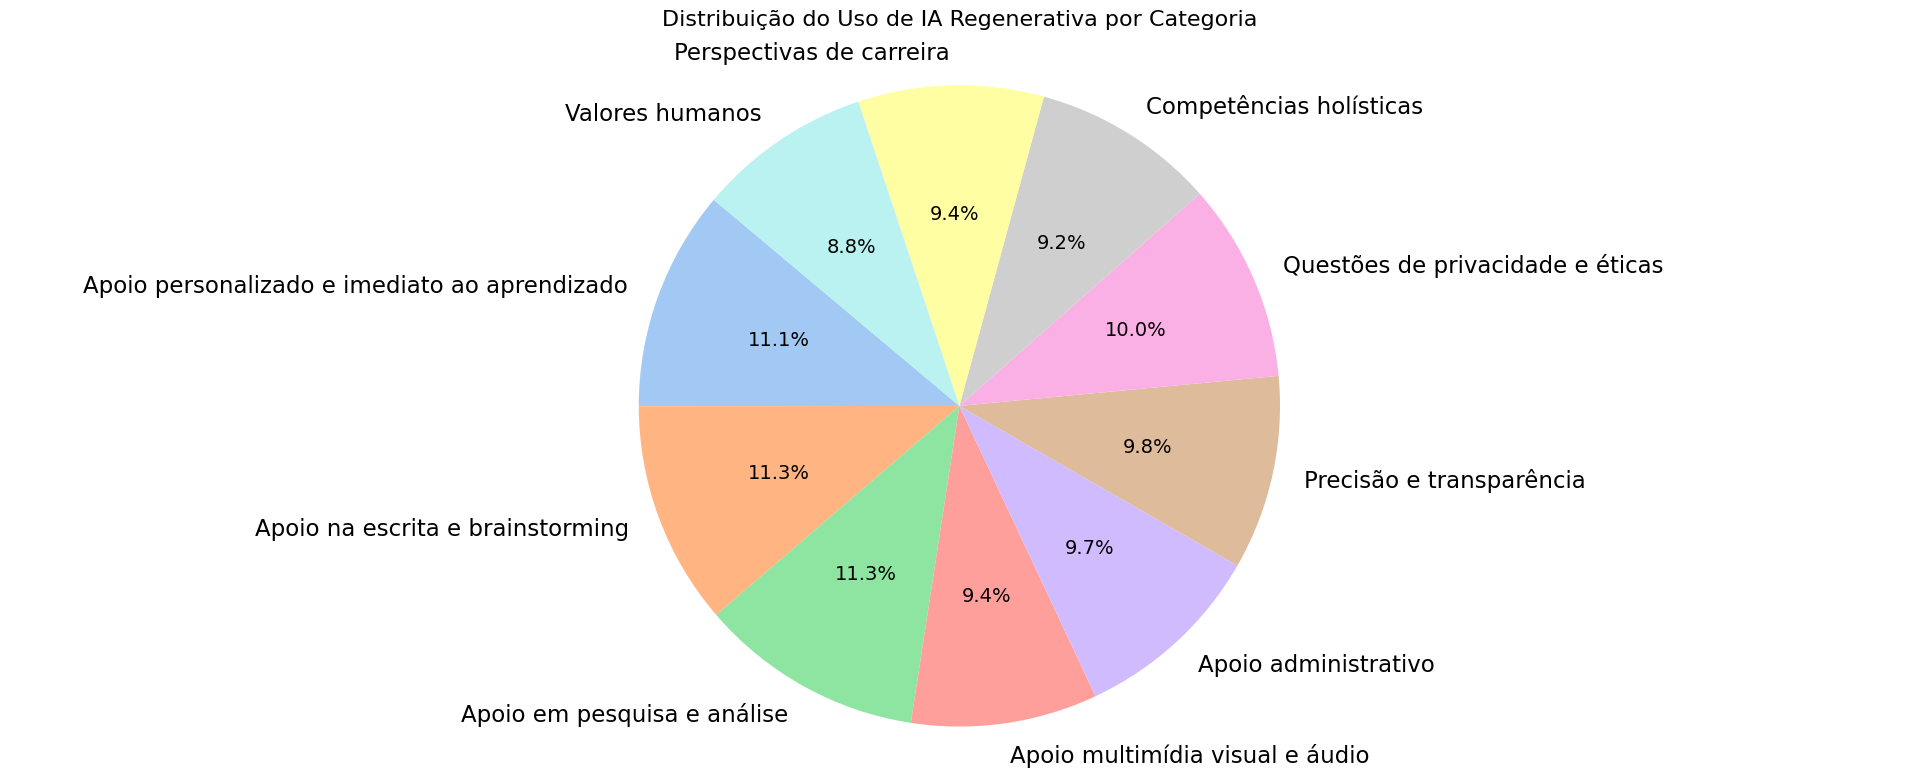

In [31]:
# Supondo que o DataFrame df_chatbot contenha as colunas de uso de IA regenerativa
# Crie uma lista com os nomes das colunas correspondentes aos diferentes usos
usos_colunas = ['Apoio personalizado e imediato ao aprendizado', 'Apoio na escrita e brainstorming',
                'Apoio em pesquisa e análise', 'Apoio multimídia visual e áudio', 'Apoio administrativo',
                'Precisão e transparência', 'Questões de privacidade e éticas', 'Competências holísticas',
                'Perspectivas de carreira', 'Valores humanos']

# Calcule a soma total de cada uso
uso_somas = df_chatbot[usos_colunas].sum()

plt.figure(figsize=(20, 8))
plt.pie(uso_somas, labels=usos_colunas, autopct='%1.1f%%', startangle=140, colors=sns.color_palette("pastel"))

plt.title('Distribuição do Uso de IA Regenerativa por Categoria', pad=20)  # Ajuste o pad conforme necessário
plt.axis('equal')
plt.tight_layout()  # Ajusta automaticamente o layout para evitar sobreposição
plt.show()



C:\Users\enzok\AppData\Local\Temp\ipykernel_20860\2588705043.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.swarmplot(x='Já usou tecnologias de IA generativa como o ChatGPT?',


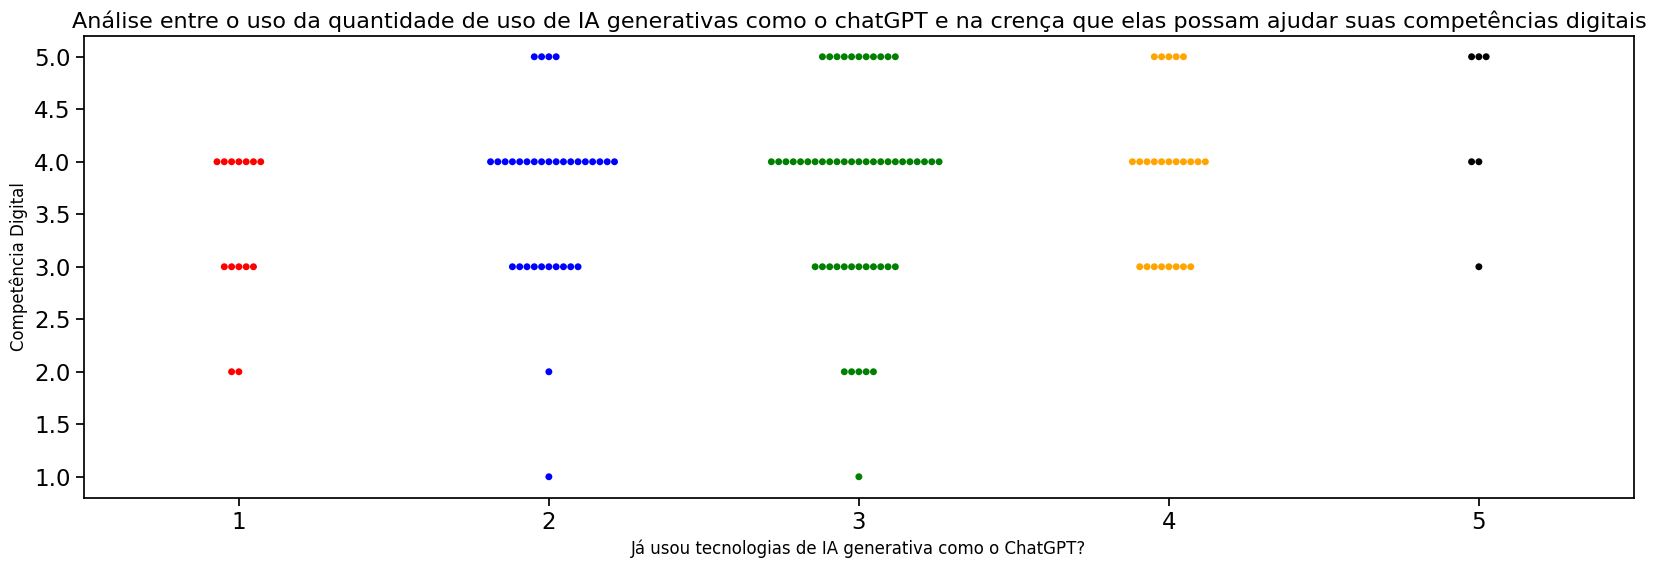

In [32]:
cores = ['red', 'blue', 'green', 'orange', 'black']

plt.figure(figsize=(20, 6))
sns.swarmplot(x='Já usou tecnologias de IA generativa como o ChatGPT?', 
            y='Acredito que tecnologias de IA generativa, como o ChatGPT, podem melhorar minha competência digital', 
            data=df_chatbot, palette=cores)

plt.title('Análise entre o uso da quantidade de uso de IA generativas como o chatGPT e na crença que elas possam ajudar suas competências digitais')
plt.xlabel('Já usou tecnologias de IA generativa como o ChatGPT?')
plt.ylabel('Competência Digital')
plt.show()


C:\Users\enzok\AppData\Local\Temp\ipykernel_20860\3300767496.py:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  mean_values = df_chatbot.groupby(['Sexo', 'Curso'])['Acredito que tecnologias de IA generativa, como o ChatGPT, podem me ajudar a economizar tempo'].mean().reset_index()


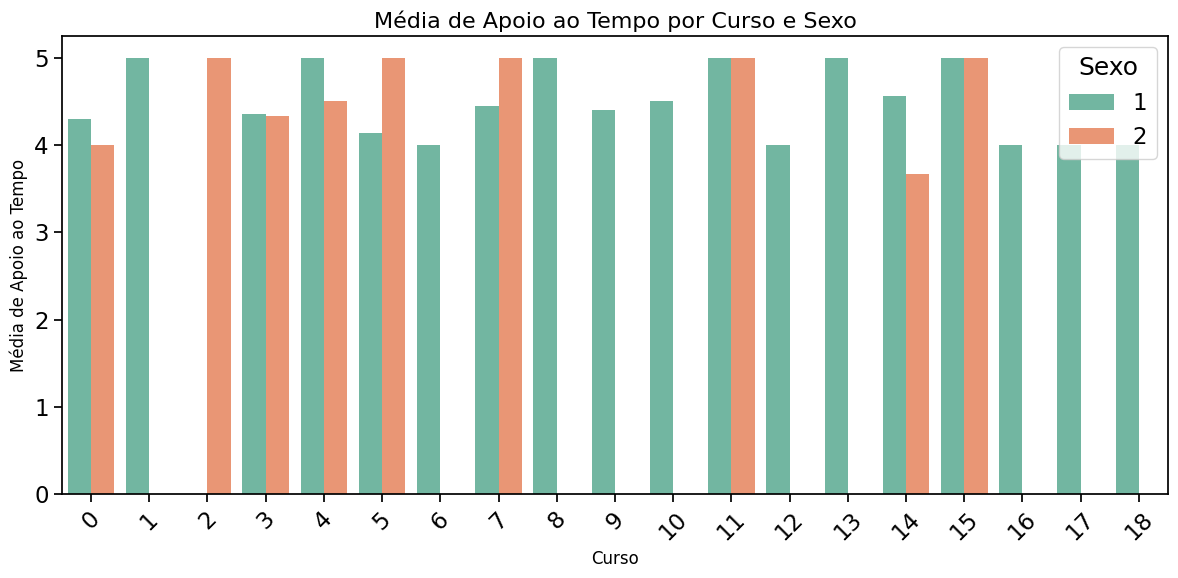

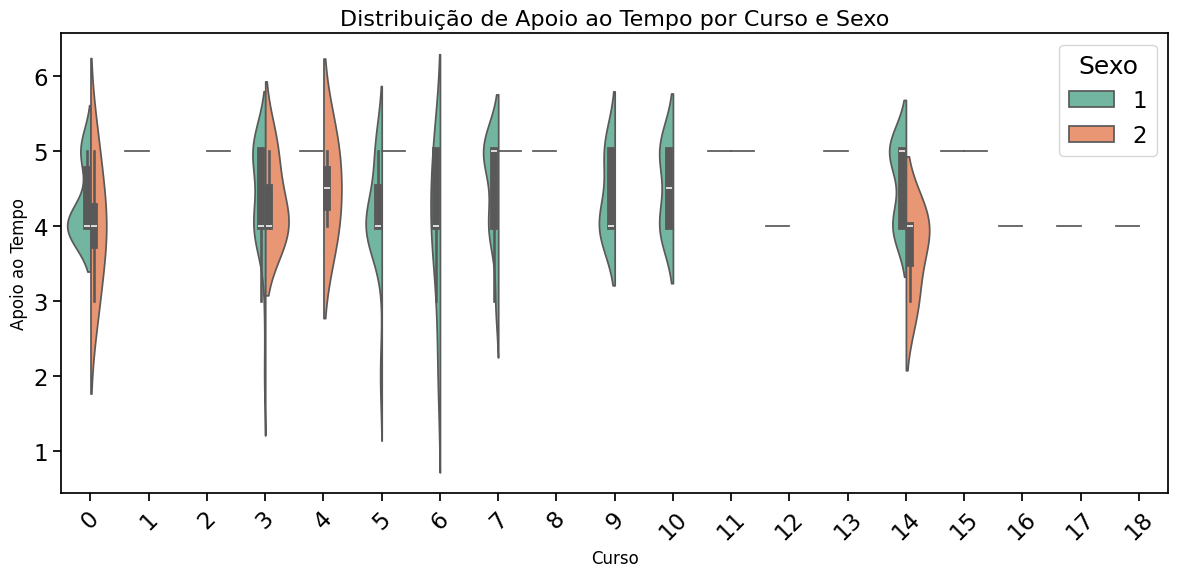

In [33]:
# Converta as colunas 'Curso' e 'Sexo' para tipo categórico
df_chatbot['Curso'] = df_chatbot['Curso'].astype('category')
df_chatbot['Sexo'] = df_chatbot['Sexo'].astype('category')

# Calcular a média da coluna de interesse para cada combinação de Sexo e Curso
mean_values = df_chatbot.groupby(['Sexo', 'Curso'])['Acredito que tecnologias de IA generativa, como o ChatGPT, podem me ajudar a economizar tempo'].mean().reset_index()

# Gráfico de barras agrupadas para visualizar as médias
plt.figure(figsize=(12, 6))
sns.barplot(data=mean_values, x='Curso', y='Acredito que tecnologias de IA generativa, como o ChatGPT, podem me ajudar a economizar tempo', hue='Sexo', palette='Set2')
plt.title('Média de Apoio ao Tempo por Curso e Sexo')
plt.xlabel('Curso')
plt.ylabel('Média de Apoio ao Tempo')
plt.legend(title='Sexo')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Gráfico de violino para visualizar a distribuição da coluna de interesse
plt.figure(figsize=(12, 6))
sns.violinplot(data=df_chatbot, x='Curso', y='Acredito que tecnologias de IA generativa, como o ChatGPT, podem me ajudar a economizar tempo', hue='Sexo', split=True, palette='Set2')
plt.title('Distribuição de Apoio ao Tempo por Curso e Sexo')
plt.xlabel('Curso')
plt.ylabel('Apoio ao Tempo')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
